In [243]:
import numpy as np
import pandas as pd

In [318]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [319]:
test_id = test["PassengerId"]


In [320]:
test.drop("PassengerId", axis = 1, inplace = True)
test.drop("Destination", axis = 1, inplace = True)
test.drop("Name", axis = 1, inplace = True)
train.drop("PassengerId", axis = 1, inplace = True)
train.drop("Destination", axis = 1, inplace = True)
train.drop("Name", axis = 1, inplace = True)
  


In [321]:
num_c = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "CryoSleep", "VIP"]
cat_c = ["HomePlanet", "Cabin"]
target_c = ["Transported"]

In [322]:
test["Age"].fillna(test["Age"].mean(), inplace = True)
train["Age"].fillna(train["Age"].mean(), inplace = True)
test.fillna(0, inplace = True)
train.fillna(0, inplace = True)

In [323]:
test[num_c] = test[num_c].apply(pd.to_numeric)
train[num_c + target_c] = train[num_c + target_c].apply(pd.to_numeric)

In [324]:
def cabin_parse(df):
  deck = []
  num = []
  side = []
  for i in range(len(df)):
    if df.loc[i, "Cabin"] != 0:
      deck.append(df.loc[i, "Cabin"][0])
      side.append(df.loc[i, "Cabin"][-1])
      num.append(int(df.loc[i, "Cabin"][2:-2]))
    else:
      deck.append(0)
      side.append(0)
      num.append(0)
  df["Cabin_deck"] = deck
  df["Cabin_side"] = side
  df["Cabin_num"] = num
  df.drop("Cabin", axis = 1, inplace = True)

In [325]:
cabin_parse(test)
cabin_parse(train)

In [326]:
cat_c = ["HomePlanet", "Cabin_deck", "Cabin_side"]
num_c.append("Cabin_num")

In [327]:
test = pd.get_dummies(test, columns = cat_c)
train = pd.get_dummies(train, columns = cat_c)

In [328]:
test.drop("HomePlanet_0", axis = 1, inplace = True)
test.drop("Cabin_deck_0", axis = 1, inplace = True)
test.drop("Cabin_side_0", axis = 1, inplace = True)
train.drop("HomePlanet_0", axis = 1, inplace = True)
train.drop("Cabin_deck_0", axis = 1, inplace = True)
train.drop("Cabin_side_0", axis = 1, inplace = True)

In [329]:
cat_c_new = []
for i in cat_c:
  cat_c_new.extend(filter(lambda x: x.startswith(i), test.columns))
cat_c = cat_c_new

In [330]:
from sklearn.model_selection import train_test_split
X_tr, X_t, y_tr, y_t = train_test_split(train[cat_c + num_c], train[target_c])

In [331]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler().fit(X_tr)
X_tr = std_sc.transform(X_tr)
X_t = std_sc.transform(X_t)

In [332]:
#from sklearn.preprocessing import MinMaxScaler
#min_max = MinMaxScaler().fit(X_tr)
#X_tr = min_max.transform(X_tr)
#X_t = min_max.transform(X_t)

In [333]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [334]:
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()

In [308]:
grid = {
    'n_neighbors': np.arange(1,11),
    'metric': ['manhattan', 'euclidean'],
    'weights': ['uniform', 'distance'],
}
search = GridSearchCV(knn, grid, cv=5, scoring = 'accuracy', n_jobs = -1)
search.fit(X_tr, y_tr)
search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}

In [335]:
knn = KNeighborsClassifier(metric = "manhattan", n_neighbors = 6, weights = "uniform").fit(X_tr, y_tr)
lr = lr.fit(X_tr, y_tr)
tree = tree.fit(X_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [336]:
from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier().fit(X_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [337]:
from sklearn import metrics

In [338]:
import matplotlib.pyplot as plt

In [339]:
def score(true, pred, pred_proba):
  print("Accuracy score: " + str(metrics.accuracy_score(true, pred)))
  print("Recall score: " + str(metrics.recall_score(true, pred)))
  print("Precision score: " + str(metrics.precision_score(true, pred)))
  fpr, tpr, _ = metrics.roc_curve(true,  pred_proba)
  auc = metrics.roc_auc_score(true, pred_proba)
  plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()
  

Accuracy score: 0.7879484820607175
Recall score: 0.7878245299910475
Precision score: 0.7971014492753623


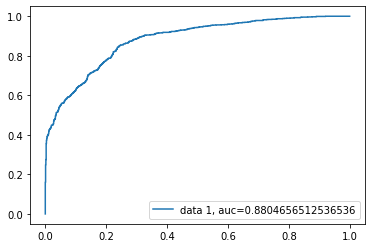

In [288]:
score(y_t, lr.predict(X_t), lr.predict_proba(X_t)[:,1])

Accuracy score: 0.7874885004599816
Recall score: 0.8152274837511606
Precision score: 0.7695004382120947


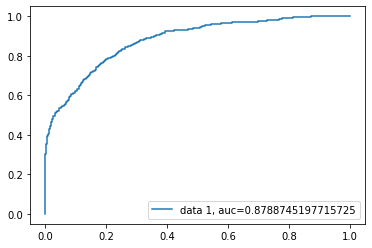

In [265]:
score(y_t, lr.predict(X_t), lr.predict_proba(X_t)[:,1])

Accuracy score: 0.7608095676172953
Recall score: 0.6948398576512456
Precision score: 0.8152400835073069


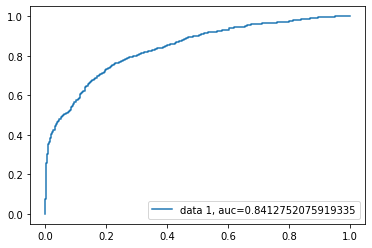

In [314]:
score(y_t, lr.predict(X_t), lr.predict_proba(X_t)[:,1])

Accuracy score: 0.7934682612695492
Recall score: 0.8134191176470589
Precision score: 0.7824933687002652


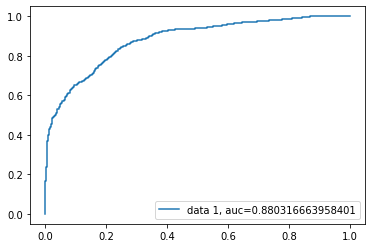

In [340]:
score(y_t, lr.predict(X_t), lr.predict_proba(X_t)[:,1])

Accuracy score: 0.766329346826127
Recall score: 0.7788719785138765
Precision score: 0.7692307692307693


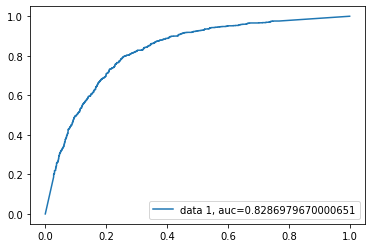

In [289]:
score(y_t, knn.predict(X_t), knn.predict_proba(X_t)[:,1])

Accuracy score: 0.7861085556577737
Recall score: 0.7799442896935933
Precision score: 0.7865168539325843


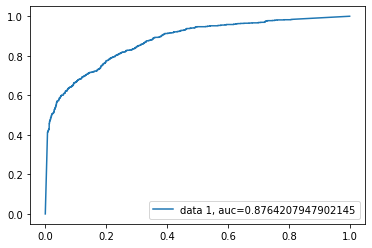

In [266]:
score(y_t, knn.predict(X_t), knn.predict_proba(X_t)[:,1])

Accuracy score: 0.7539098436062558
Recall score: 0.6628113879003559
Precision score: 0.8268590455049944


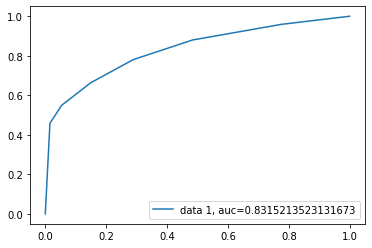

In [315]:
score(y_t, knn.predict(X_t), knn.predict_proba(X_t)[:,1])

Accuracy score: 0.7240110395584176
Recall score: 0.7215756490599821
Precision score: 0.7360730593607306


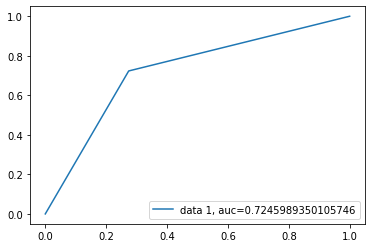

In [290]:
score(y_t, tree.predict(X_t), tree.predict_proba(X_t)[:,1])

Accuracy score: 0.7488500459981601
Recall score: 0.7585886722376973
Precision score: 0.7407071622846781


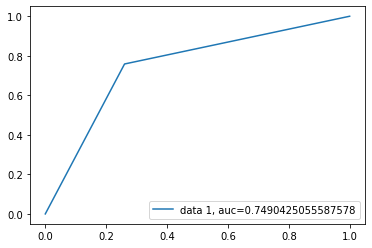

In [267]:
score(y_t, tree.predict(X_t), tree.predict_proba(X_t)[:,1])

Accuracy score: 0.7451701931922723
Recall score: 0.7473309608540926
Precision score: 0.7567567567567568


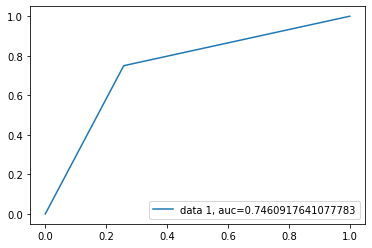

In [316]:
score(y_t, tree.predict(X_t), tree.predict_proba(X_t)[:,1])

Accuracy score: 0.7985280588776449
Recall score: 0.7610294117647058
Precision score: 0.8230616302186878


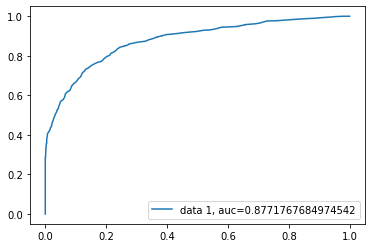

In [341]:
score(y_t, rd.predict(X_t), rd.predict_proba(X_t)[:,1])

In [343]:
test_x = std_sc.transform(test)
prediction = pd.DataFrame([test_id,  lr.predict(test_x)]).transpose()
prediction.set_index("PassengerId", inplace = True)
prediction.columns=["Transported"]
prediction.to_csv("LR2.csv")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [241]:
train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,...,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,...,0,1,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0,...,0,0,0,0,0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,...,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,...,1,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,98,...,1,0,0,0,0,0,0,0,1,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,False,1499,...,0,0,0,0,0,0,1,0,0,1
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,1500,...,0,0,0,0,0,0,1,0,0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,608,...,0,0,0,0,1,0,0,0,0,1


In [344]:
test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Earth,...,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_P,Cabin_side_S
0,1,27.000000,0,0.0,0.0,0.0,0.0,0.0,3,1,...,0,0,0,0,0,0,1,0,0,1
1,0,19.000000,0,0.0,9.0,0.0,2823.0,0.0,4,1,...,0,0,0,0,0,1,0,0,0,1
2,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,38.000000,0,0.0,6652.0,0.0,181.0,585.0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,0,20.000000,0,10.0,0.0,635.0,0.0,0.0,5,1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.000000,0,0.0,0.0,0.0,0.0,0.0,1496,1,...,0,0,0,0,0,0,1,0,0,1
4273,0,42.000000,0,0.0,847.0,17.0,10.0,144.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4274,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,296,0,...,0,0,0,1,0,0,0,0,1,0
4275,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,297,0,...,0,0,0,1,0,0,0,0,1,0
